# Project 1: Entrance Exam Performance Prediction

## Introduction:


**Author**: Purinat33

**Dataset**: https://www.kaggle.com/datasets/adilshamim8/student-performance-on-an-entrance-examination

## Objective:

The goal is to predict the performance of a given student as various classes based on the information given

## Code

### Dataset Loading

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/entranceExam.csv')
df

,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
0,male,General,NO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS,ONE,Excellent
1,male,OBC,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE,TWO,Excellent
2,male,OBC,OA,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE,TWO,Excellent
3,male,General,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER,ONE,Excellent
4,male,General,OA,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE,TWO,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
661,female,ST,WA,SEBA,AHSEC,ENGLISH,Good,Vg,OTHERS,HOUSE_WIFE,ONE,Average
662,male,ST,WA,SEBA,AHSEC,ENGLISH,Vg,Good,CULTIVATOR,HOUSE_WIFE,THREE,Average
663,male,ST,WA,SEBA,CBSE,ENGLISH,Good,Vg,OTHERS,SCHOOL_TEACHER,TWO,Average
664,male,ST,WA,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,HOUSE_WIFE,THREE,Average


### Dataset Inspection



#### Column Count

We want to make sure that categorical columns, like `Gender` doesn't contain typo or other errors.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                666 non-null    object
 1   Caste                 666 non-null    object
 2   coaching              666 non-null    object
 3   Class_ten_education   666 non-null    object
 4   twelve_education      666 non-null    object
 5   medium                666 non-null    object
 6   Class_X_Percentage    666 non-null    object
 7   Class_XII_Percentage  666 non-null    object
 8   Father_occupation     666 non-null    object
 9   Mother_occupation     666 non-null    object
 10  time                  666 non-null    object
 11  Performance           666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


No null/empty data, moving on to each column

In [4]:
for column in df.columns:
    print(df[column].value_counts())

Gender
male      355
female    311
Name: count, dtype: int64
Caste
General    329
OBC        162
ST         108
SC          67
Name: count, dtype: int64
coaching
WA    449
NO    150
OA     67
Name: count, dtype: int64
Class_ten_education
SEBA      396
CBSE      249
OTHERS     21
Name: count, dtype: int64
twelve_education
AHSEC     368
CBSE      290
OTHERS      8
Name: count, dtype: int64
medium
ENGLISH     536
OTHERS       74
ASSAMESE     56
Name: count, dtype: int64
Class_X_Percentage
Excellent    511
Vg           101
Good          41
Average       13
Name: count, dtype: int64
Class_XII_Percentage
Excellent    398
Vg           181
Good          75
Average       12
Name: count, dtype: int64
Father_occupation
OTHERS             277
SCHOOL_TEACHER     109
BUSINESS           103
DOCTOR              55
ENGINEER            45
COLLEGE_TEACHER     27
CULTIVATOR          27
BANK_OFFICIAL       23
Name: count, dtype: int64
Mother_occupation
HOUSE_WIFE         442
SCHOOL_TEACHER     108
OTHERS  

#### Column Frequency

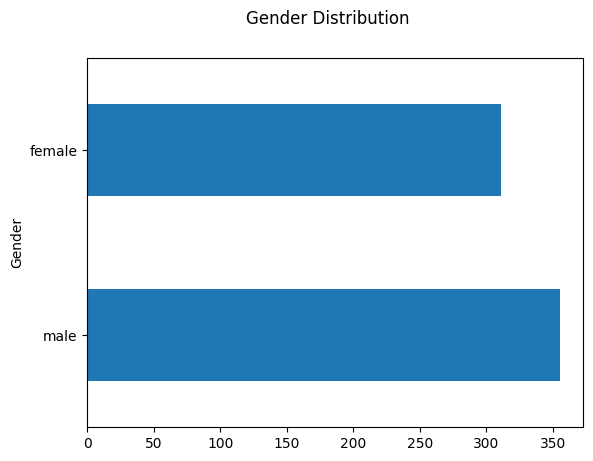

In [5]:
# Plotting the frequency of each value separated by gender
# https://stackoverflow.com/questions/50158081/how-to-create-overlay-bar-plot-in-pandas
fig, ax = plt.subplots()
df["Gender"].value_counts().plot(kind='barh')
fig.suptitle("Gender Distribution")

plt.show()

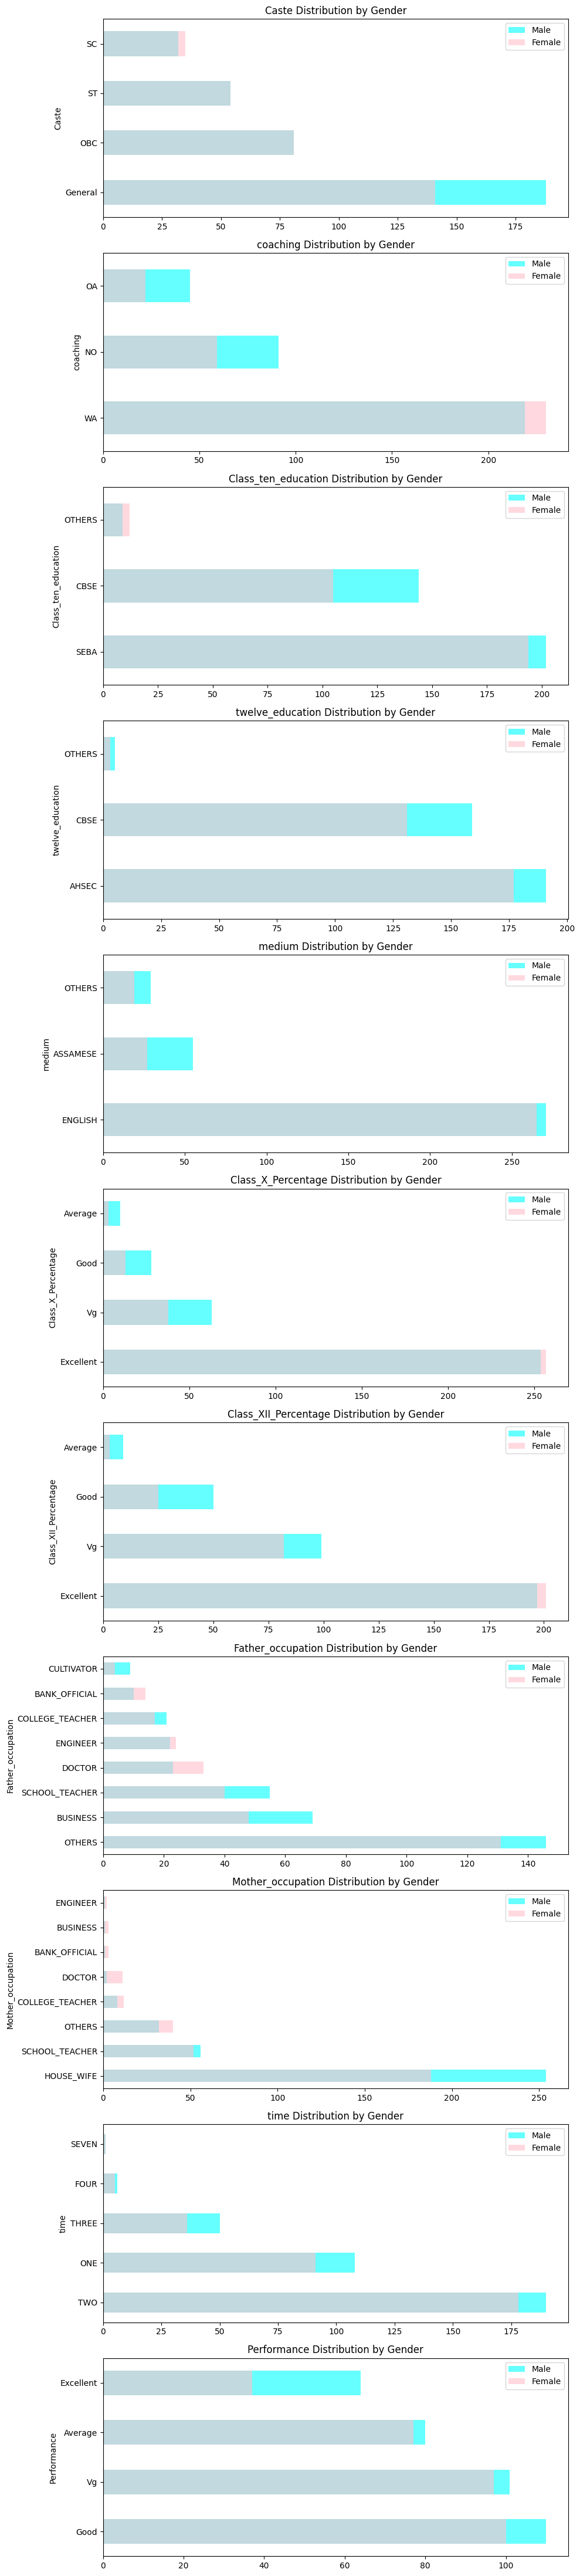

In [6]:
# Plotting the frequency of each value separated by gender
# https://stackoverflow.com/questions/50158081/how-to-create-overlay-bar-plot-in-pandas

# Exclude Gender column
cols = [c for c in df.columns if c != 'Gender']

# Create a figure with enough subplots
n = len(cols)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 4*n))

# If only one column, axes is not iterable, so wrap it
if n == 1:
    axes = [axes]

for ax, column in zip(axes, cols):
    # Male bars
    df.loc[df['Gender'] == 'male', column].value_counts().plot(
        kind='barh', ax=ax, color='cyan', alpha=0.6, label='Male')

    # Female bars
    df.loc[df['Gender'] == 'female', column].value_counts().plot(
        kind='barh', ax=ax, color='pink', alpha=0.6, label='Female')

    ax.set_title(f"{column} Distribution by Gender")
    ax.legend()

fig.tight_layout()
plt.show()

### Preprocessing

#### Generate `X` (features) and `y` (target)

In [7]:
# Splitting into X and y arrays
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

Now that we have inspected the original data and found no irregularity like missing values, we can now start preprocessing for the machine learning process by:

1. Splitting: Splitting the `X` and `y` data into training and testing set
2. Encoding: Turning categorical data (e.g. `male`) into numerical data
    * Feature: `OneHotEncoder`
    * Target: `LabelEncoder`

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
encoder = OneHotEncoder()
encoderY = LabelEncoder()

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

y_train_encoded = encoderY.fit_transform(y_train)
y_test_encoded = encoderY.transform(y_test)

### Component Reduction (For Visualization)

The shape of our data:

In [9]:
print(df.shape)

(666, 12)


To plot the 11 features of all performance classes is basically impossible. So we used a technique called **PCA** to create only 2 new features which can be used for plotting the relationship and distinction between the target classes

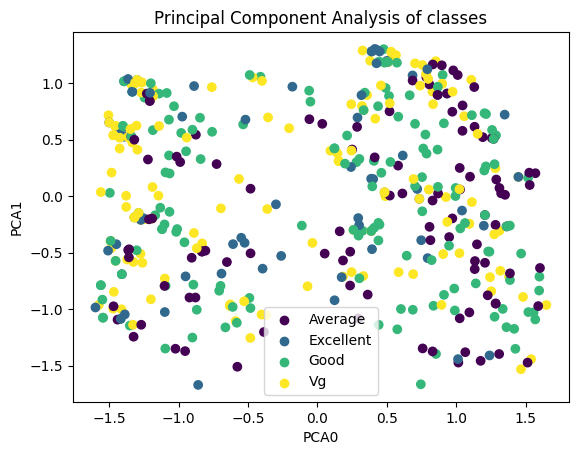

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_encoded)
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train_encoded, cmap='viridis')

class_names = encoderY.classes_   # e.g. ["Avg", "Good", "Poor"]

# Build legend with names
classes = np.unique(y_train_encoded)
for class_val in classes:
    plt.scatter([], [],
                c=[scatter.cmap(scatter.norm(class_val))],
                label=class_names[class_val])


plt.title("Principal Component Analysis of classes")
plt.xlabel("PCA0")
plt.ylabel("PCA1")
plt.legend()
plt.show()

The plot shows that the classes cannot be distinctly separated using a linear dimensionality technique like PCA. That the projection of 11 features into 2 features are not sufficient to clearly describe the data.

#### Using a different technique to reduce the dimensionality of the data

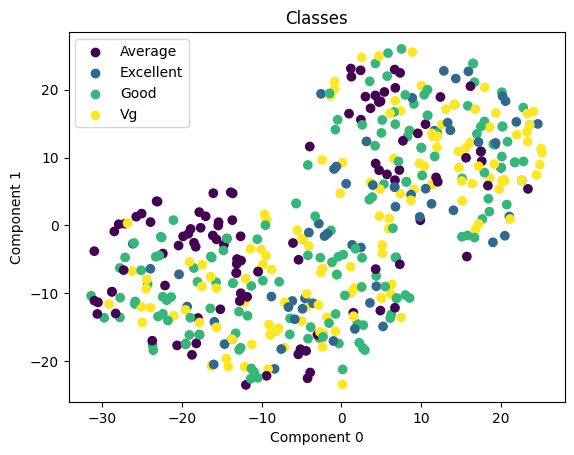

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)
X_tsne = tsne.fit_transform(X_train_encoded)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                      c=y_train_encoded, cmap='viridis')

class_names = encoderY.classes_   

# Build legend with names
classes = np.unique(y_train_encoded)
for class_val in classes:
    plt.scatter([], [],
                c=[scatter.cmap(scatter.norm(class_val))],
                label=class_names[class_val])


plt.title("Classes")
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.legend()
plt.show()

In conclusion: Low-dimensional visualizations, through PCA or t-SNE, do not show clear class separation; model performance likely relies on higher-dimensional interactions.

Read more on: www.link

### Clustering

Visualizing classes separation through a clustering unsupervised learning algorithm

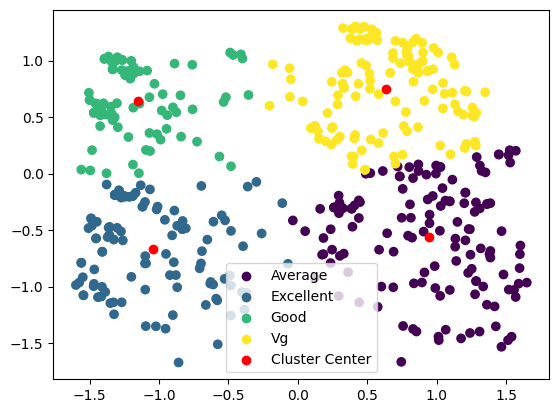

In [12]:
from sklearn.cluster import KMeans

# https://www.askpython.com/python/examples/plot-k-means-clusters-python
# PCA is only for plotting the scale in 2D, the algorithm still takes in the full features
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_encoded)

kmean = KMeans(n_clusters=4, random_state=0, init='k-means++')
labels = kmean.fit_predict(X_pca)


classes = np.unique(y_train_encoded)
for class_val in classes:
    plt.scatter([], [],
                c=[scatter.cmap(scatter.norm(class_val))],
                label=class_names[class_val])

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='red', label='Cluster Center')
plt.legend()
plt.show()

Using unsupervised algorithm like KMeans, we are able to capture the classes into 4 neatly separated clusters

### Simple Machine Learning 

Now that we got the ideas of what the data is like, we can start making prediction by building a machine learning model.

#### Goal:

For simplicity sake, we want the model with the best accuracy, since we are not aiming for medical related diagnosis, recall and precision are not as important as accuracy.

#### Dummy Classifier

Serves as a simple baseline to compare against other more complex classifiers.

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

model = DummyClassifier(strategy='most_frequent')
model.fit(X_train_encoded, y_train_encoded)
print(
    f"Training Score: {(cross_val_score(model, X_train_encoded, y_train_encoded, cv=6).mean() * 100).round(3)}%")
print(
    f"Testing Score: {((model.score(X_test_encoded, y_test_encoded)) * 100)}%")

Training Score: 33.261%
Testing Score: 27.500000000000004%


We can interpret this as: "If the model always pick the class with the most frequent amount of occurrence, how accurate will this model be?"

#### Linear Models

Starting simple, we choose a linear model: Logistic Regression, which despite the name, is a classification algorithm.

The model works by finding coefficients to each feature.

Training Score: 50.641%
Testing Score: 47.5%


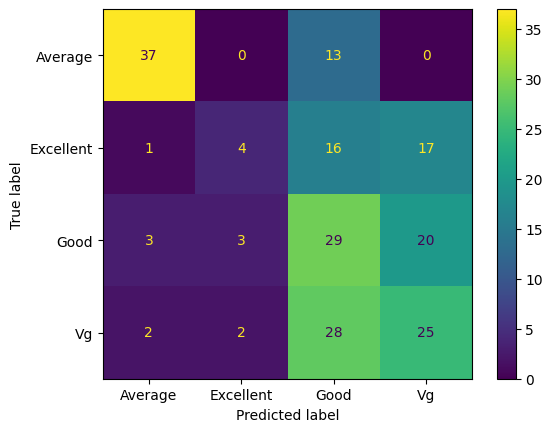

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

model = LogisticRegression()
model.fit(X_train_encoded, y_train_encoded)
print(
    f"Training Score: {(cross_val_score(model, X_train_encoded, y_train_encoded, cv=6).mean() * 100).round(3)}%")
print(
    f"Testing Score: {((model.score(X_test_encoded, y_test_encoded)) * 100)}%")

y_pred = model.predict(X_test_encoded)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test_encoded, y_pred=y_pred), display_labels=encoderY.classes_).plot()
plt.show()

The performance is not great. We can inspect more than just the accuracy:

In [15]:
print(classification_report(y_true=y_test_encoded, y_pred=y_pred, target_names=encoderY.classes_))

              precision    recall  f1-score   support

     Average       0.86      0.74      0.80        50
   Excellent       0.44      0.11      0.17        38
        Good       0.34      0.53      0.41        55
          Vg       0.40      0.44      0.42        57

    accuracy                           0.47       200
   macro avg       0.51      0.45      0.45       200
weighted avg       0.51      0.47      0.46       200



In [16]:
# We're going to run the same code and plot the same graph many times, hence the function

def learn( model ):
    model.fit(X_train_encoded, y_train_encoded)
    print(
        f"Training Score: {(cross_val_score(model, X_train_encoded, y_train_encoded, cv=6).mean() * 100).round(3)}%")
    print(
        f"Testing Score: {((model.score(X_test_encoded, y_test_encoded)) * 100)}%")

    y_pred = model.predict(X_test_encoded)

    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test_encoded, y_pred=y_pred), display_labels=encoderY.classes_).plot()
    plt.show()
    print(classification_report(y_true=y_test_encoded, y_pred=y_pred, target_names=encoderY.classes_))

#### Tuning the model

There are several methods that can be performed to achieve better results:

1. Regularization (L1 & L2)
    * Adding penalties to large coefficients, forcing them to shrink down
2. Scaling 
    * Not applicable, since all our columns are categorically encoded (either 0 or 1)
    * At least not until we introduce actual numerical data (e.g. percentage score, weight, height etc.)
3. Feature Selection
4. Hyperparameter Tuning
5. Different Model Selection

##### Regularization (L1, L2)

Training Score: 51.068%
Testing Score: 48.0%


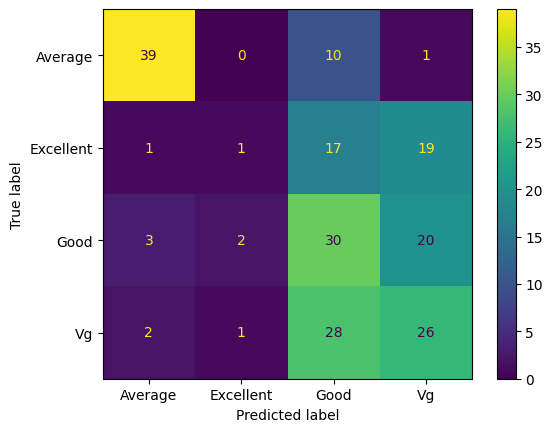

              precision    recall  f1-score   support

     Average       0.87      0.78      0.82        50
   Excellent       0.25      0.03      0.05        38
        Good       0.35      0.55      0.43        55
          Vg       0.39      0.46      0.42        57

    accuracy                           0.48       200
   macro avg       0.47      0.45      0.43       200
weighted avg       0.47      0.48      0.45       200



In [17]:
learn(LogisticRegression(penalty='l1', solver='liblinear')) # L1 

Using L1 Regularization, in terms of accuracy, we see a minor level of performance improvement.

Training Score: 50.205%
Testing Score: 46.5%


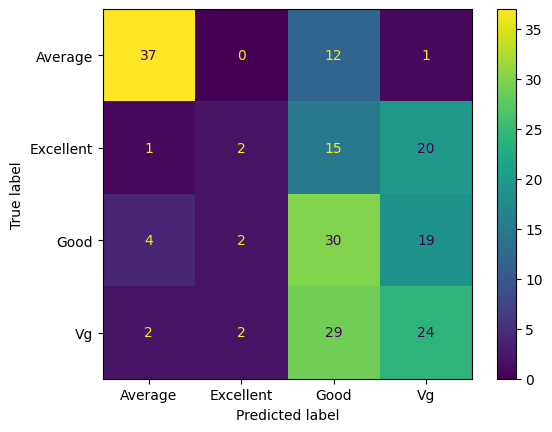

              precision    recall  f1-score   support

     Average       0.84      0.74      0.79        50
   Excellent       0.33      0.05      0.09        38
        Good       0.35      0.55      0.43        55
          Vg       0.38      0.42      0.40        57

    accuracy                           0.47       200
   macro avg       0.47      0.44      0.43       200
weighted avg       0.48      0.47      0.44       200



In [18]:
learn(LogisticRegression(penalty='l2', solver='liblinear')) # L2 

The same could not be said for L2 Regularization, which behaved similarly to the Logistic Regression model without any parameters being set.

As a matter of fact, the Logistic Regression model has a default penalty being L2 Regularization, hence the performance.

#### Non-Linear Model: Support Vector Machine

Training Score: 52.575%
Testing Score: 49.0%


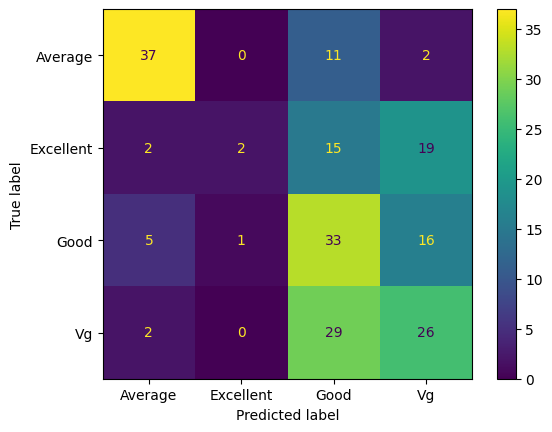

              precision    recall  f1-score   support

     Average       0.80      0.74      0.77        50
   Excellent       0.67      0.05      0.10        38
        Good       0.38      0.60      0.46        55
          Vg       0.41      0.46      0.43        57

    accuracy                           0.49       200
   macro avg       0.56      0.46      0.44       200
weighted avg       0.55      0.49      0.46       200



In [19]:
from sklearn.svm import SVC

learn(SVC())

#### Non-Linear Model: Decision Tree

Training Score: 45.058%
Testing Score: 45.5%


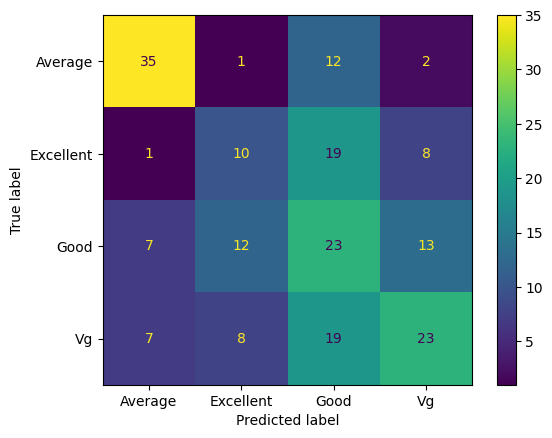

              precision    recall  f1-score   support

     Average       0.70      0.70      0.70        50
   Excellent       0.32      0.26      0.29        38
        Good       0.32      0.42      0.36        55
          Vg       0.50      0.40      0.45        57

    accuracy                           0.46       200
   macro avg       0.46      0.45      0.45       200
weighted avg       0.47      0.46      0.46       200



In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
learn(model)

#### Non-Linear Model: K-Nearest Neighbours

Training Score: 42.491%
Testing Score: 47.5%


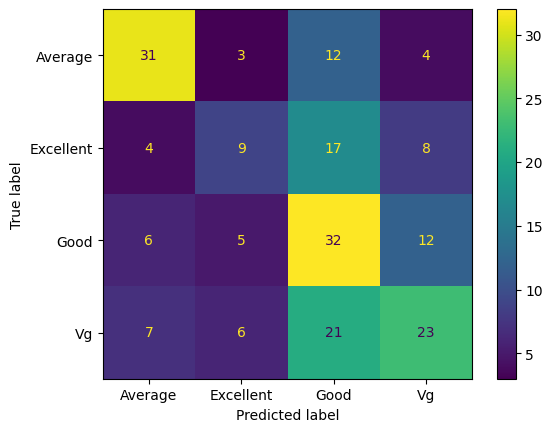

              precision    recall  f1-score   support

     Average       0.65      0.62      0.63        50
   Excellent       0.39      0.24      0.30        38
        Good       0.39      0.58      0.47        55
          Vg       0.49      0.40      0.44        57

    accuracy                           0.47       200
   macro avg       0.48      0.46      0.46       200
weighted avg       0.48      0.47      0.47       200



In [39]:
from sklearn.neighbors import KNeighborsClassifier

learn(KNeighborsClassifier())

#### Ensemble Model: Random Forest

Training Score: 49.356%
Testing Score: 45.0%


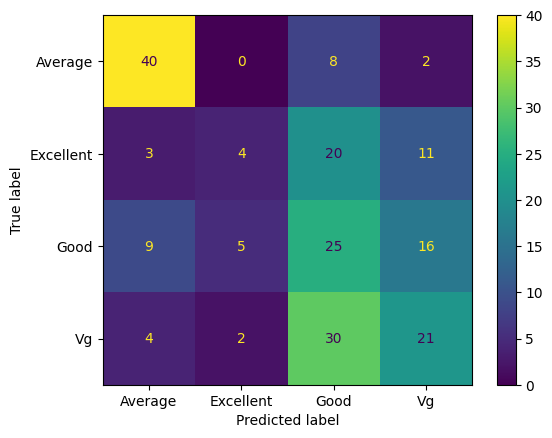

              precision    recall  f1-score   support

     Average       0.71      0.80      0.75        50
   Excellent       0.36      0.11      0.16        38
        Good       0.30      0.45      0.36        55
          Vg       0.42      0.37      0.39        57

    accuracy                           0.45       200
   macro avg       0.45      0.43      0.42       200
weighted avg       0.45      0.45      0.43       200



In [35]:
from sklearn.ensemble import RandomForestClassifier

learn(RandomForestClassifier())

#### Ensemble Model: Gradient Boosting

Training Score: 47.841%
Testing Score: 49.0%


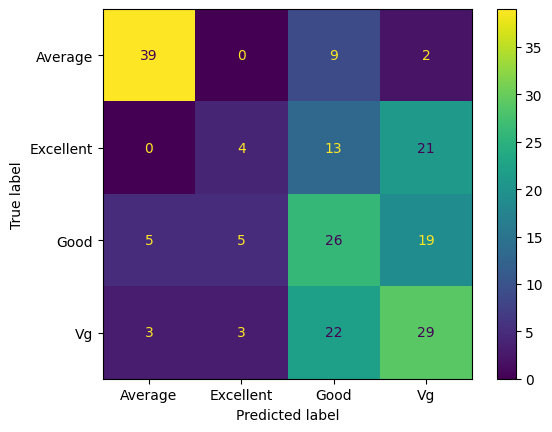

              precision    recall  f1-score   support

     Average       0.83      0.78      0.80        50
   Excellent       0.33      0.11      0.16        38
        Good       0.37      0.47      0.42        55
          Vg       0.41      0.51      0.45        57

    accuracy                           0.49       200
   macro avg       0.49      0.47      0.46       200
weighted avg       0.49      0.49      0.47       200



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

learn(GradientBoostingClassifier())

#### Recap:

So far, we've tried 7 different machine learning models:

* Logistic Regression
* Logistic Regression with L1 Regularization
* Support Vector Machine
* Decision Tree
* K-Nearest Neighbours
* Random Forest
* Gradient Boosting Classifier

All of the models had varying degrees of accuracy but the one with the best level of accuracy is Support Vector Machine, which we will used for future tuning and engineering. 

Training Score: 52.575%
Testing Score: 49.0%


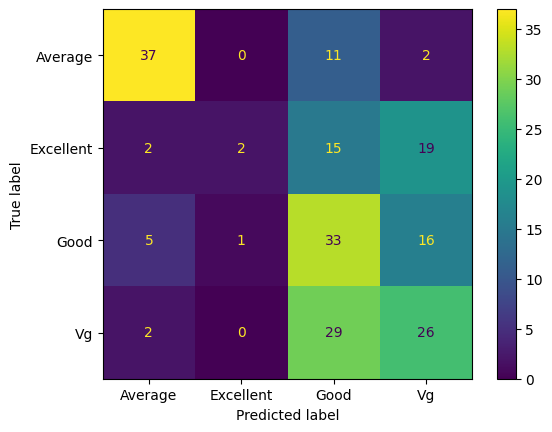

              precision    recall  f1-score   support

     Average       0.80      0.74      0.77        50
   Excellent       0.67      0.05      0.10        38
        Good       0.38      0.60      0.46        55
          Vg       0.41      0.46      0.43        57

    accuracy                           0.49       200
   macro avg       0.56      0.46      0.44       200
weighted avg       0.55      0.49      0.46       200



In [46]:
from sklearn.svm import SVC

model = SVC()
learn(model=model)

We can now use two of the methods for tuning a model's performance on our chosen model:

1. Feature Selection
2. Hyperparameter Tuning

#### Feature Selection

Some features, despite being in the same dataset, are not as important as the others, and might actually be detrimental to the model's learning instead of helping it. In **linear models**, this can easily be visualized and explained through the coefficients of each feature, unlike SVM.

The following example shows feature selection in a linear model. A similar process will then be applied to the chosen SVM model.

Training data has 50.641025641025635% Accuracy


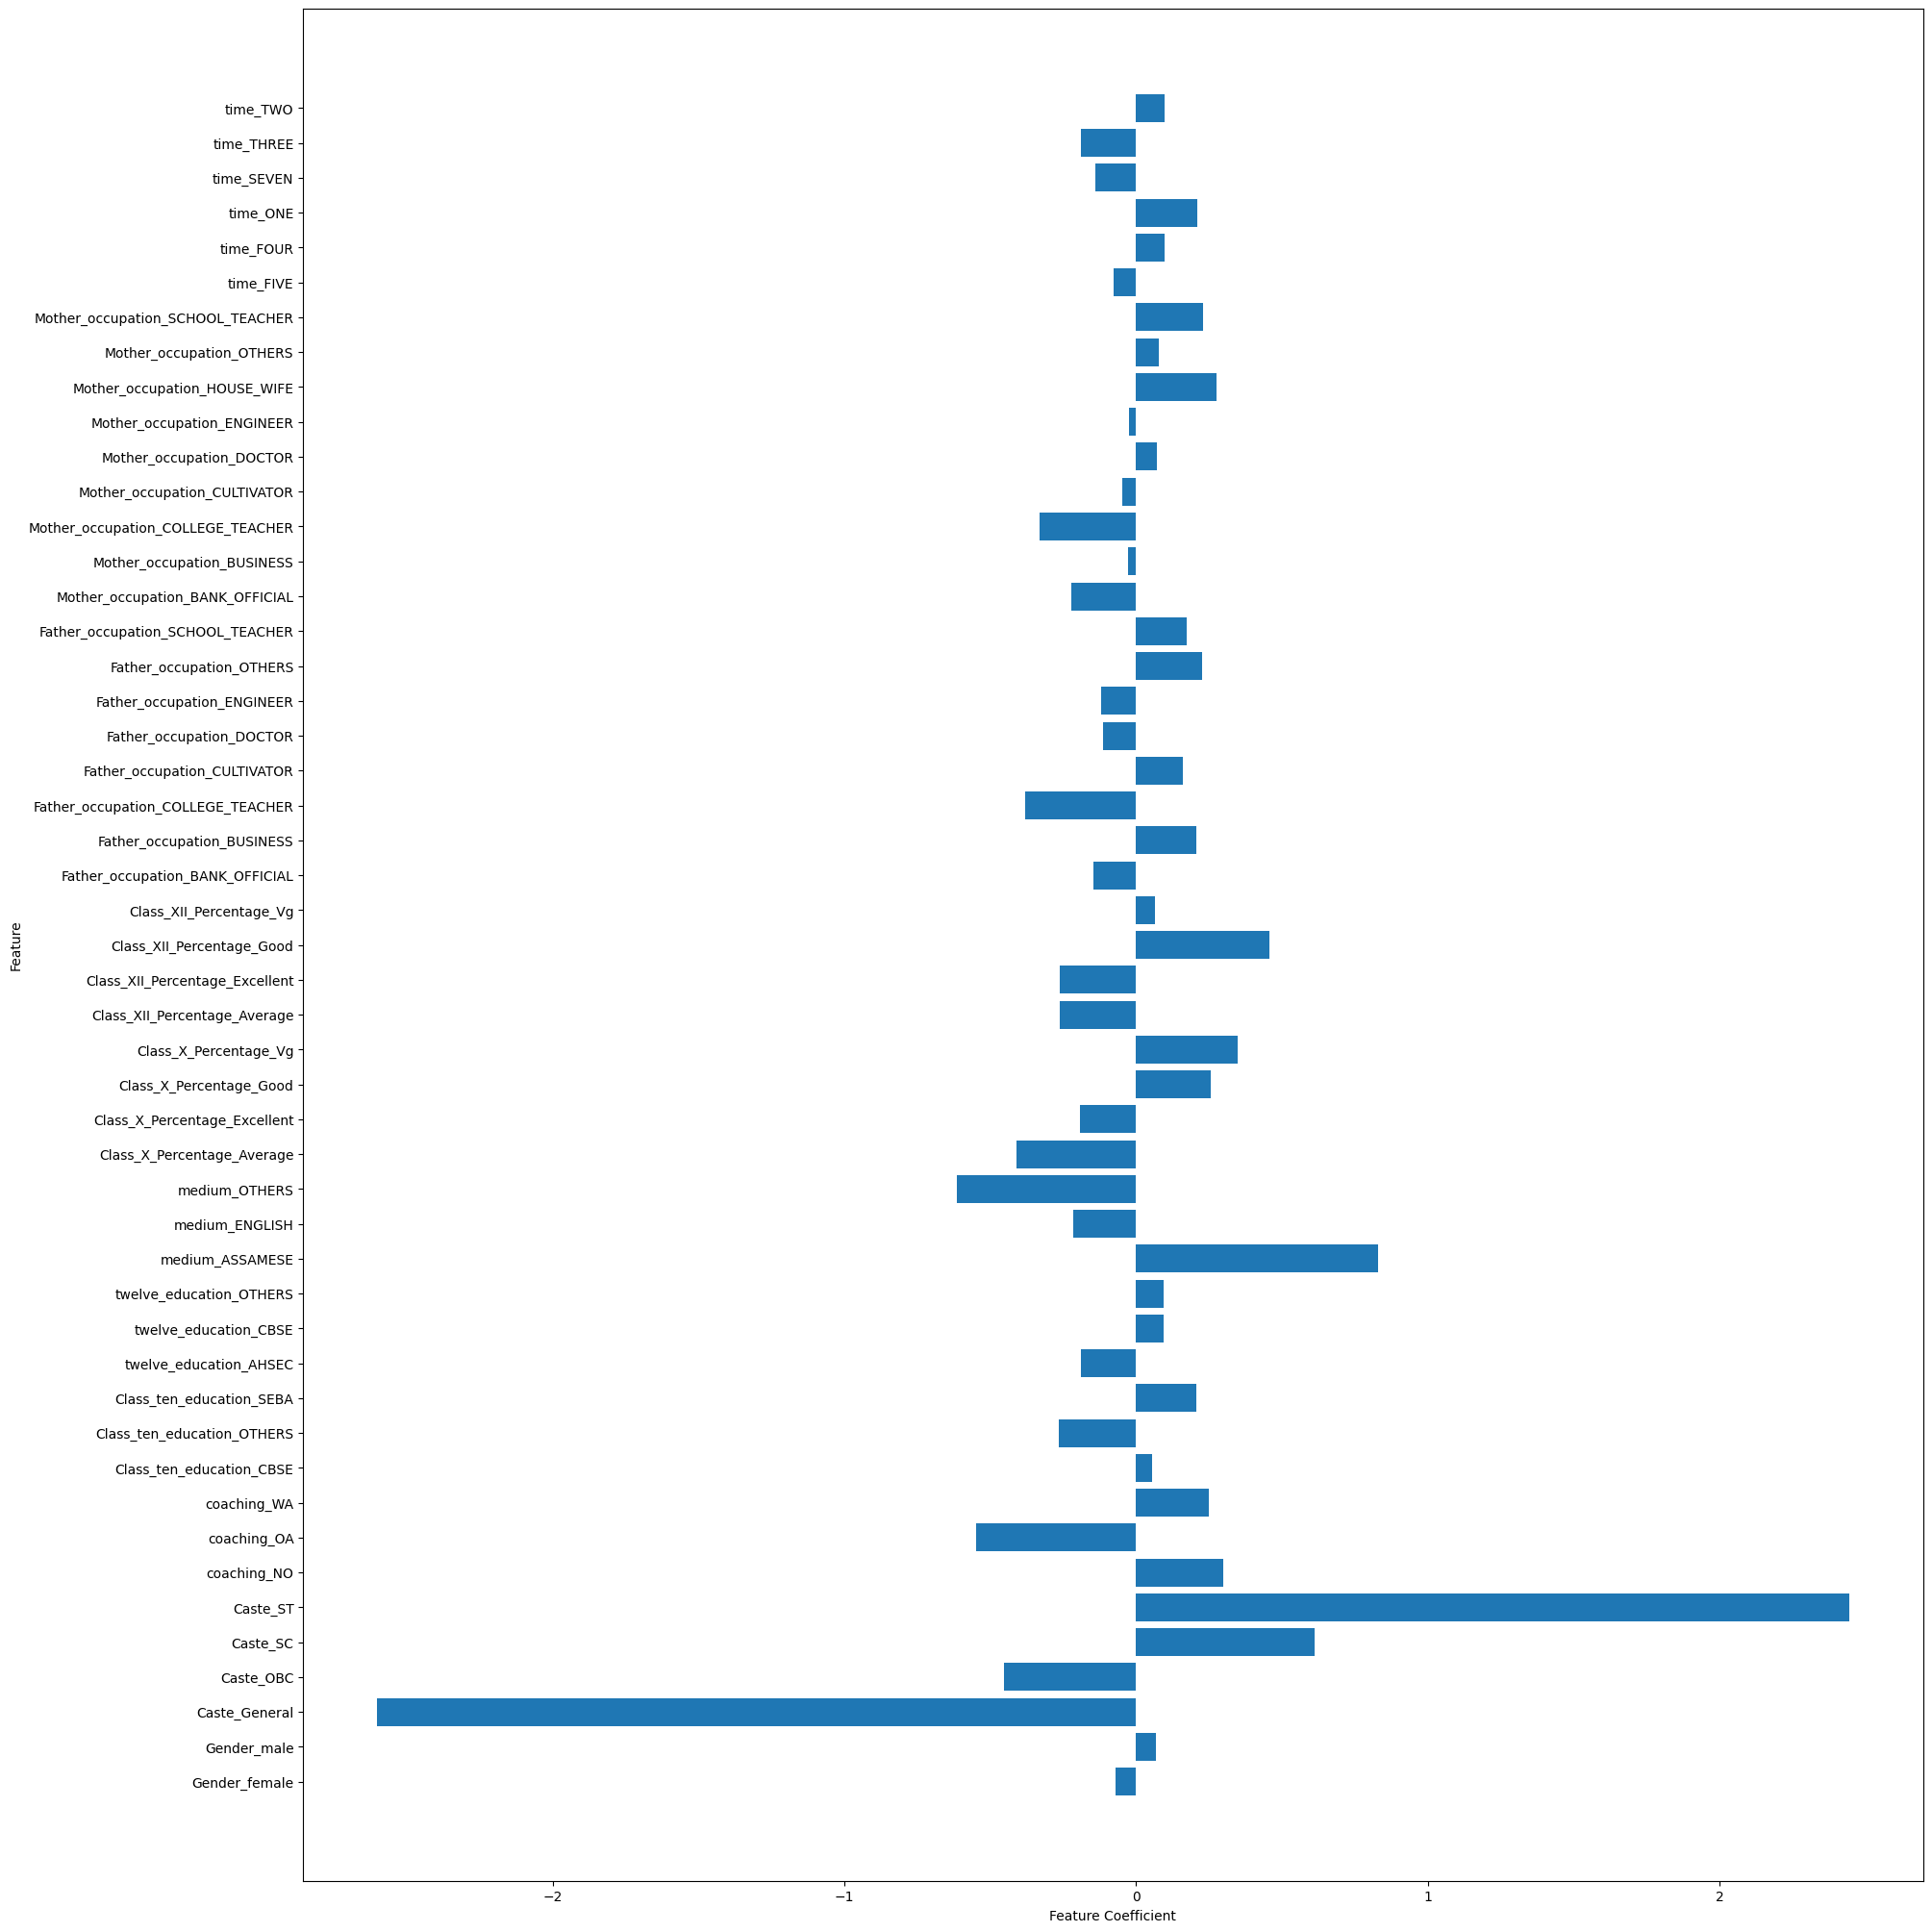

In [129]:
# Example in Linear model
clf = LogisticRegression()
clf.fit(X_train_encoded, y_train_encoded)
print(f"Training data has {(cross_val_score(clf, X_train_encoded, y_train_encoded, cv=6).mean())*100}% Accuracy")

# Plotting
df_dummy = pd.get_dummies(df.iloc[:,0:-1])
plt.figure(figsize=(20,20))
plt.barh(range(X_train_encoded.shape[1]), clf.coef_[0])
plt.yticks(np.arange(X_train_encoded.shape[1]), df_dummy.columns.values)
plt.tight_layout()
plt.ylabel("Feature")
plt.xlabel("Feature Coefficient")
plt.show()

We can see that some features (e.g. Gender_male, Gender_female) have coefficients that are almost zero. We can drop these features and retrain the model for better performance.

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=50) # Keep 50% of the features
X_train_encoded_selected = selector.fit_transform(X_train_encoded, y_train_encoded)
print(f"Before feature selection: {X_train_encoded.shape}")
print(f"After feature selection: {X_train_encoded_selected.shape}")

Before feature selection: (466, 49)
After feature selection: (466, 24)


In [131]:
clf.fit(X_train_encoded_selected, y_train_encoded)
print(f"Training data has {(cross_val_score(clf, X_train_encoded_selected, y_train_encoded, cv=6).mean())*100}% Accuracy")

Training data has 51.925851925851916% Accuracy


An increase in performance can be seen.

In [ ]:
# Applying the same thing to SVC model
from sklearn.feature_selection import SelectKBest, f_oneway
print(f"Pre Feature Selection data has {(cross_val_score(model, X_train_encoded, y_train_encoded, cv=6).mean())*100}% Accuracy")

selector = SelectKBest(f_oneway, k=48) # Dropping one feature
X_train_encoded_selected = selector.fit_transform(X_train_encoded, y_train_encoded)
model.fit(X_train_encoded_selected, y_train_encoded)

print(f"Post Feature Selection data has {(cross_val_score(model, X_train_encoded_selected, y_train_encoded, cv=6).mean())*100}% Accuracy")

Pre Feature Selection data has 52.575202575202574% Accuracy
Post Feature Selection data has 52.577977577977585% Accuracy


In our SVM case, dropping 1 feature has a miniscule amount of improvement, any other number of dropping causes our model to perform worse than before.

#### Hyperparameter Tuning

A machine learning model comes with a set of parameters the user can modified (called hyperparameters).
Tuning these values can help with improving a model's performance

In [149]:
# List of SVM parameters
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Any combination of these parameters can be changed.

Training Score: 48.923%
Testing Score: 44.0%


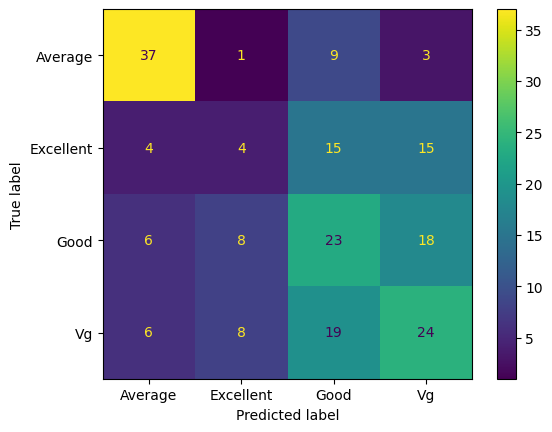

              precision    recall  f1-score   support

     Average       0.70      0.74      0.72        50
   Excellent       0.19      0.11      0.14        38
        Good       0.35      0.42      0.38        55
          Vg       0.40      0.42      0.41        57

    accuracy                           0.44       200
   macro avg       0.41      0.42      0.41       200
weighted avg       0.42      0.44      0.43       200



In [162]:
C = 10
model = SVC(C=C)
learn(model)

##### Using Grid Search to Perform Tuning

An automated hyperparameter tuning technique in machine learning that systematically explores all possible combinations of specified hyperparameter values to find the best-performing model

In [ ]:
from sklearn.model_selection import GridSearchCV

print(f"Accuracy before Grid Search: {(cross_val_score(model, X_train_encoded_selected, y_train_encoded)*100).mean()}")
# Specify the values to be used
model = SVC()
param_grid = {
    "C": [0.0001, 0.001, 0.01, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')
grid.fit(X_train_encoded_selected, y_train_encoded)
# Since grid search perform CV, we can call `score` directly
print(f"Accuracy after Grid Search: {(grid.best_score_)*100}%")

Accuracy before Grid Search: 47.64584763212079
Accuracy after Grid Search: 52.3495767558911%


In [188]:
# Find the best parameters 
print(grid.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [190]:
# Final testing of the data
X_test_encoded_selected = selector.transform(X_test_encoded)
print(f"Final Testing: {grid.score(X_test_encoded_selected, y_test_encoded)*100}%")

Final Testing: 45.0%


#### Pipelining
 
The previous codes are a bit messy with various variables. For simplicity, we are going to wrap everythinginto a pipeline. 

Starting from the splitting, encoding, and model testing.

In [194]:
df

,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
0,male,General,NO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS,ONE,Excellent
1,male,OBC,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE,TWO,Excellent
2,male,OBC,OA,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE,TWO,Excellent
3,male,General,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER,ONE,Excellent
4,male,General,OA,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE,TWO,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
661,female,ST,WA,SEBA,AHSEC,ENGLISH,Good,Vg,OTHERS,HOUSE_WIFE,ONE,Average
662,male,ST,WA,SEBA,AHSEC,ENGLISH,Vg,Good,CULTIVATOR,HOUSE_WIFE,THREE,Average
663,male,ST,WA,SEBA,CBSE,ENGLISH,Good,Vg,OTHERS,SCHOOL_TEACHER,TWO,Average
664,male,ST,WA,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,HOUSE_WIFE,THREE,Average


In [225]:
# Considering using Stratified since our classes are a little imbalanced
from sklearn.model_selection import StratifiedKFold

X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# The X_test and y_test would never be touched at all until the end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

In [230]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import chi2

label = LabelEncoder()
y_train_encoded = label.fit_transform(y_train)
y_test_encoded = label.transform(y_test)

pipe = Pipeline([
    ('encoder_x', OneHotEncoder(handle_unknown="ignore")), # Encode X columns
    ('selector', SelectKBest(score_func=chi2)), # Select X features
    ('svc', LogisticRegression(max_iter=2000)) # The Classifier
])

param_grid = {
    "selector__k": [10, 20, 30, 40, 45, 'all'],
    "svc__C": [0.0001, 0.001, 0.01, 1, 10, 100, 1000],
    # 'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    # 'svc__gamma': ['scale', 'auto']
}

In [231]:
print(f"Base Score: {((cross_val_score(pipe, X_train, y_train_encoded, cv=cv).mean())*100).round(3)}%")

Base Score: 51.684%


In [232]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
)

grid.fit(X_train, y_train_encoded)
print(f"GridSearch Parameters: {grid.best_params_}")
print(f"GridSearch Score: {grid.best_score_ * 100}%")

GridSearch Parameters: {'selector__k': 30, 'svc__C': 1}
GridSearch Score: 56.4516129032258%


In [233]:
print(f"Final Test Accuracy: {grid.best_estimator_.score(X_test, y_test_encoded) * 100}%")

Final Test Accuracy: 48.0%
